# EOR Screening Using ML Algorithms


This project consists of implementing an EOR Screening by using Machine Learning algorithms. It must be mentioned that the dataset used for training and evaluating these algorithms have a size of roughly 200 successful EOR Projects (Rows or observations) from some countries, as well as 7 reservoir parameters, which are the feature or dependent variables. Furthermore, the target variable of this model is a categorical variable, which contains 5 EOR Methods (classes) such as the steam injection method, CO2 injection method, HC injection method, polymer injection method, and combustion in situ method.

## 1) Import Python Packages for Data Science

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [65]:
cd

C:\Users\fredd


In [66]:
cd OneDrive

C:\Users\fredd\OneDrive


In [67]:
cd Escritorio

C:\Users\fredd\OneDrive\Escritorio


In [68]:
cd M.Sc

C:\Users\fredd\OneDrive\Escritorio\M.Sc


## 2) Import the Dataset

In [69]:
data = pd.read_csv('DATA WORLWIDE EOR PROJECTSP.csv')

In [70]:
data

,Country,EOR_Method,Porosity,Permiability,Depth,Gravity,Viscocity,Temperature,Oil_Saturation,Project_Eval,Profit
0,USA,Polymer,14.0,40.0,4800.0,34.0,2.63,102.0,50.0,succ,No
1,Norway,Steam Injection,31.0,205.0,1200.0,19.0,32.00,105.0,57.0,Disc.,No
2,USA,CO2 Injection,23.0,30.0,2680.0,40.0,1.00,82.0,60.0,Disc.,No
3,USA,CO2 Injection,16.0,20.0,4500.0,41.0,1.10,97.0,35.0,Disc.,good
4,USA,CO2 Injection,18.0,2.0,5400.0,42.0,0.40,104.0,39.0,Disc.,good
...,...,...,...,...,...,...,...,...,...,...,...
198,USA,HC injection,25.0,150.0,4500.0,18.0,100.00,85.0,65.0,succ,No
199,USA,HC injection,25.0,150.0,4900.0,20.0,100.00,100.0,65.0,succ,No
200,Canada,Steam Injection,33.0,7000.0,1600.0,10.0,500000.00,55.0,85.0,succ,No
201,Canada,Steam Injection,33.0,7000.0,4226.6,26.9,8837.30,129.8,60.0,succ,No


## 3) Data Preparation

### 3.1) Exploratory Data Analysis (EDA)

### 3.1.1) Data Description

In [71]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         203 non-null    object 
 1   EOR_Method      203 non-null    object 
 2   Porosity        203 non-null    float64
 3   Permiability    203 non-null    float64
 4   Depth           203 non-null    float64
 5   Gravity         203 non-null    float64
 6   Viscocity       203 non-null    float64
 7   Temperature     203 non-null    float64
 8   Oil_Saturation  203 non-null    float64
 9   Project_Eval    203 non-null    object 
 10  Profit          203 non-null    object 
dtypes: float64(7), object(4)
memory usage: 17.6+ KB


### 3.1.2) Statistical Summary

In [72]:
data.describe()

,Porosity,Permiability,Depth,Gravity,Viscocity,Temperature,Oil_Saturation
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,23.176502,1398.012315,4226.613793,26.879803,8837.250296,129.815764,60.040394
std,22.877027,2385.858371,2831.695135,11.300216,46386.283444,76.529299,16.831308
min,0.280000,1.000000,175.000000,8.000000,0.140000,54.000000,0.800000
25%,12.000000,10.000000,1500.000000,14.000000,1.000000,99.000000,50.000000
50%,20.000000,160.000000,4500.000000,30.000000,2.300000,106.000000,60.000000
75%,30.000000,2000.000000,6000.000000,36.000000,1612.500000,154.000000,70.000000
max,303.000000,10000.000000,10000.000000,48.000000,500000.000000,1000.000000,94.000000


### 3.1.3) Visualizations

Boxplots of the categorical variable EOR method vs its feature variables are shown as follows:

In [73]:
px.box(data, x="EOR_Method", y="Permiability")

In [74]:
px.box(data, x="EOR_Method", y="Depth")

In [75]:
px.box(data, x="EOR_Method", y="Gravity")

In [76]:
px.box(data, x="EOR_Method", y="Oil_Saturation")

Now, there have been plotted some scatter plots in order to identify the relationships among the feature variables, as well as the presence of outliers.

In [77]:
px.scatter(data,  x="Temperature", y="Permiability")

In [78]:
px.scatter(data,  x="Temperature", y="Depth")

In [79]:
px.scatter(data,  x="Temperature", y="Oil_Saturation")

In [80]:
px.scatter(data,  x="Temperature", y="Gravity")

Finally, this Pair plot shows scatter plots of all feature variables, as well as the statistic distribution of each of them in the diagonal.

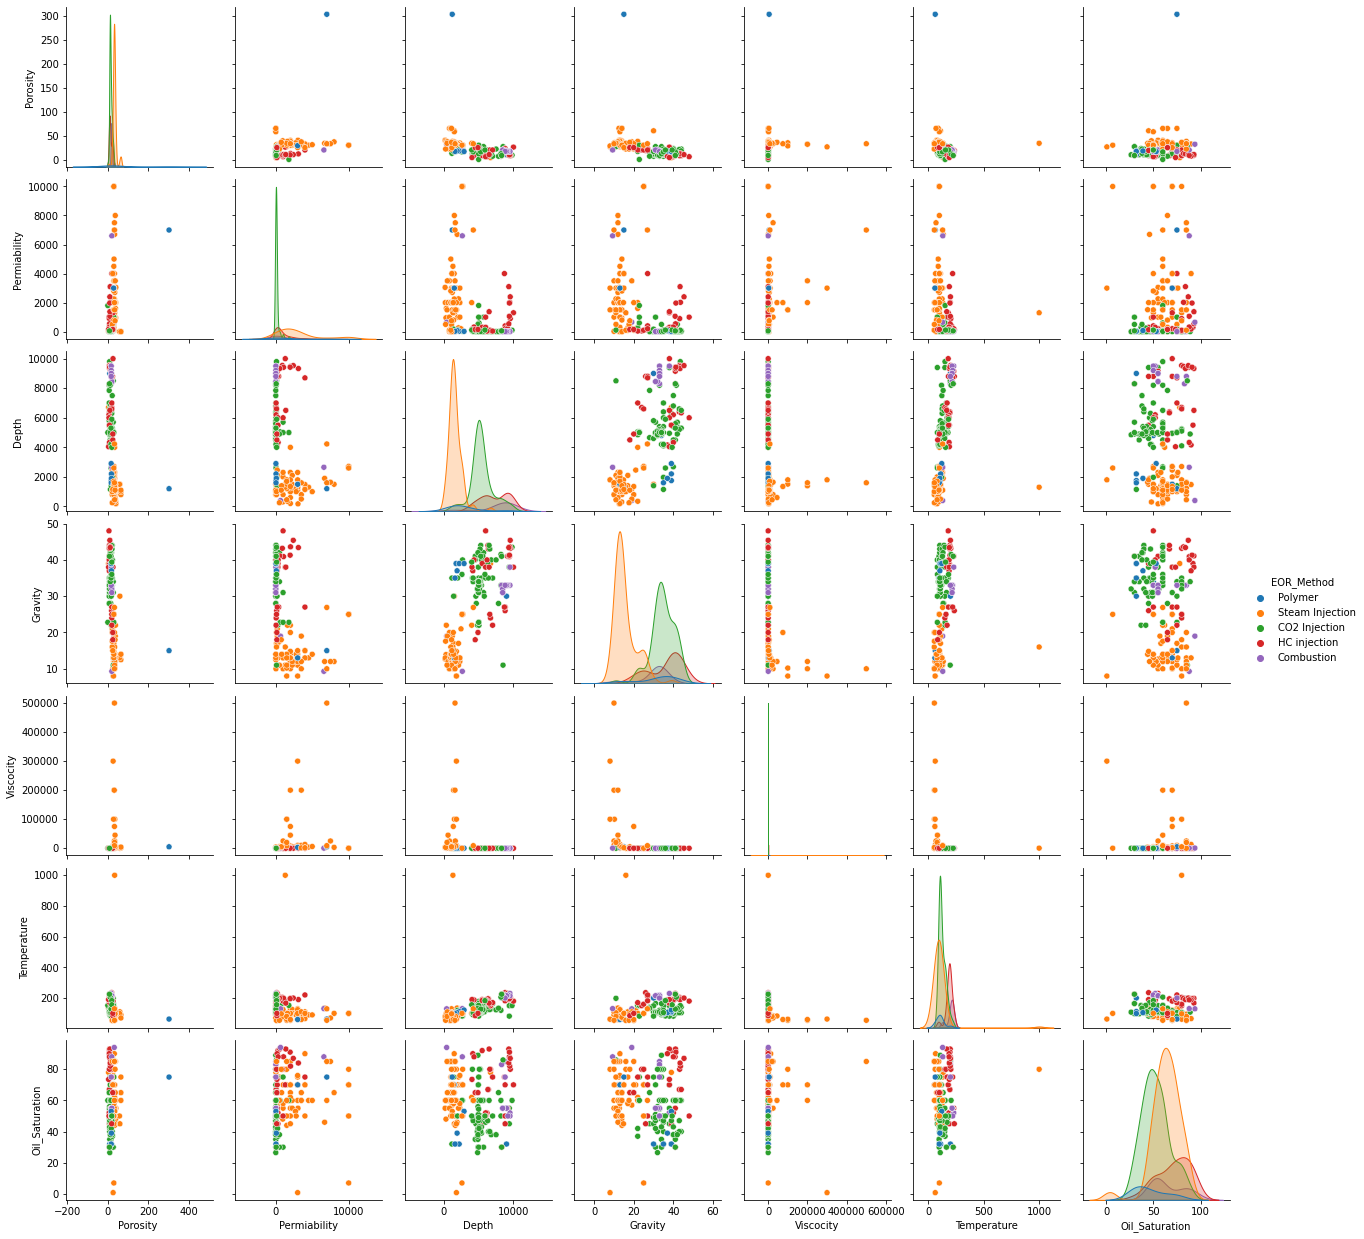

In [81]:
sns.pairplot(data, hue="EOR_Method")

## 3.2) Data Preprocessing

This step is split into 3 parts, which are: 
1) Data cleaning by using a heatmap in order to look for null data 
2) Correlation matrix used for checking the relationship among the feature variables, as well as identify if there is multicollinearity
3) Feature selection 
4) Data transforming, where the numerical variables are normalized,  whereas the categorical variables were labeled and encoded.

### 3.2.1) Data Cleaning

This heatmap helps us to confirm that there is no presence of any null data.

<AxesSubplot:>

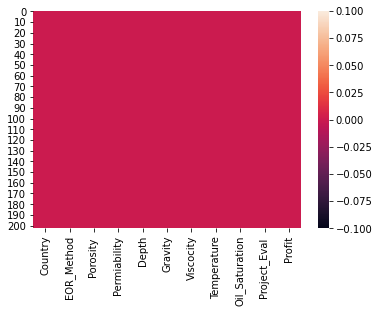

In [82]:
sns.heatmap(data.isnull()) 

### 3.2.2) Correlation Matrix


Regarding this correlation matrix, there is no presence of multicollinearity because the correlation among all feature variables are less than 80%.

<AxesSubplot:>

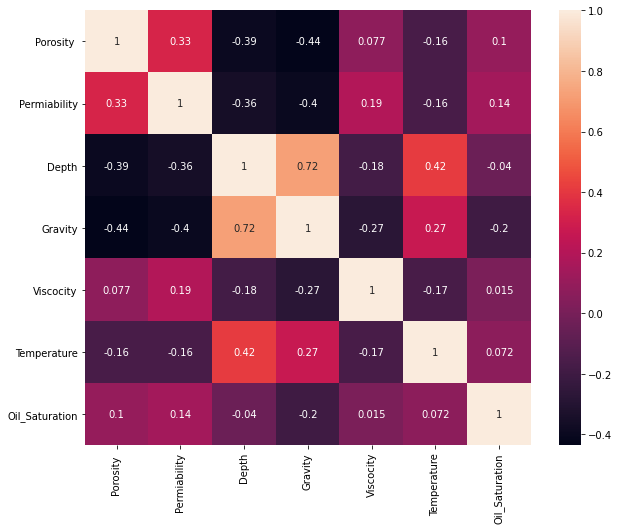

In [83]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool), ax=ax)

### 3.2.3) Feature Selection

This step is performed in order to know the importance that represents each feature variable with the target variable as this is categorical.

In [84]:
# Feature Selection (Feature importance)
X = data.iloc[:,2:9].values #Feature Variables
y = data.iloc[:,1:2].values # Target Variable

In [85]:
# The next codes are used to desploy the importance between each feature variable with the target variable
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

<ipython-input-85-941600bec294>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[0.11515864 0.11154995 0.23022156 0.23805882 0.09098884 0.13469745
 0.07932473]


### 3.2.4) Data Transforming

Here, the numerical variables (features) were normalized because is easier for the models to work with ranges between 0 - 1. On the other hand, the categorical variable (EOR methods) was labeled and encoded because the programming languages can not understand words but numbers.

In [86]:
from sklearn.preprocessing import MinMaxScaler # Normalization of the numerical variables
sc = MinMaxScaler()
X = sc.fit_transform(X)
from sklearn.preprocessing import LabelEncoder # Data Labeling for categorical variable
le = LabelEncoder()
dfle = data
dfle.EOR_Method = le.fit_transform(dfle.EOR_Method)
from sklearn.preprocessing import OneHotEncoder # Encoding of categorical variable
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

# 4) Data Split and model training

The dataset was split into 80% for training and 20% for testing

In [87]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

## 4.1) Model training using the KNN algorithm

This model was trained using its main parameter (n_neighbors).

In [88]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors = 2, p=2, metric= 'euclidean')
Knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

## 4.2) Model training using the decision tree algorithm

This model was trained with one of its main parameters (max_depth).

In [89]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth = 1)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

# 5) Model Evaluation

## 5.1) KNN Algorithm

In [90]:
Knn.score(X_train, y_train)

0.8395061728395061

In [91]:
Knn.score(X_test, y_test)

0.7317073170731707

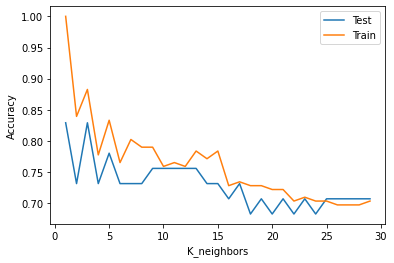

In [92]:
# Plot of Accuracy vs K values using the training and testing data
neighbors = np.arange(1, 30) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test)
plt.plot(neighbors, test_accuracy, label = 'Test') 
plt.plot(neighbors, train_accuracy, label = 'Train') 
plt.legend() 
plt.xlabel('K_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

## 5.2) DT Algorithm

In [93]:
arbol.score(X_train, y_train)

0.7345679012345679

In [94]:
arbol.score(X_test, y_test)

0.7560975609756098

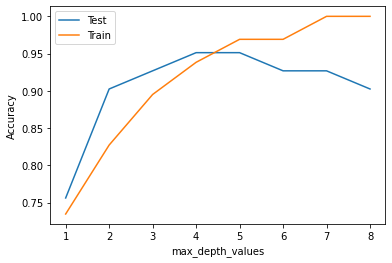

In [95]:
# Plot of Accuracy vs max depth values using the training and testing data
max_depth = np.arange(1, 9)
train_accuracy = np.empty(len(max_depth))
test_accuracy = np.empty(len(max_depth))
for i, r in enumerate(max_depth):
    Tree = DecisionTreeClassifier(max_depth=r)
    Tree.fit(X_train, y_train)
    train_accuracy[i] = Tree.score(X_train, y_train)
    test_accuracy[i] = Tree.score(X_test, y_test)
plt.plot(max_depth, test_accuracy, label = 'Test')
plt.plot(max_depth, train_accuracy, label = 'Train')
plt.legend()
plt.xlabel('max_depth_values')
plt.ylabel('Accuracy')
plt.show()

# 6) Model deployment (Predictions)

In [96]:
def predict(Porosity=29, Permiability=4689, Depth=1200 ,Gravity=8, Viscocity=490058, Temperature=150, Oil_Saturation=38.4):
  cnames = ['Porosity', 'Permiability', 'Depth', 'Gravity', 'Viscocity', 'Temperature', 'Oil_Saturation']
  data = [[Porosity, Permiability, Depth, Gravity, Viscocity, Temperature, Oil_Saturation]]
  my_X = pd.DataFrame(data=data, columns=cnames)
  my_X = sc.transform(my_X)
  return Knn.predict(my_X)

In [97]:
if np.argmax(predict())==0:
    print('CO2 Injection')
elif np.argmax(predict())==1:
    print('Combustion')
elif np.argmax(predict())==2:
    print('HC Injection')
elif np.argmax(predict())==3:
    print('Polymer')
elif np.argmax(predict())==4:
    print('Steam Injection')

Steam Injection


In [98]:
predict()

array([[0., 0., 0., 0., 1.]])